# Домашнее задание №6 "Теория оптимизации"

Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [10]:
import numpy as np
from scipy.optimize import approx_fprime
from scipy.optimize import differential_evolution
from sympy import *
import math
import matplotlib.pyplot as plt

In [67]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
# print(result['nit'])
result



     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

## Поэкспериментируем со значениями параметров функции differential_evolution()
цель - уменьшение числа итераций (nit)

## Параметр strategy

In [44]:
strategy_type = {'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin','best2bin', 'rand2bin', 'rand1bin'}
strategy_type

{'best1exp',
 'best2bin',
 'best2exp',
 'currenttobest1bin',
 'currenttobest1exp',
 'rand1bin',
 'rand1exp',
 'rand2bin',
 'rand2exp',
 'randtobest1bin',
 'randtobest1exp'}

 Минимальное значение числа итераций 76 достигается методом randtobest1bin: 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2373
     nit: 76
 success: True
       x: array([0., 0.])


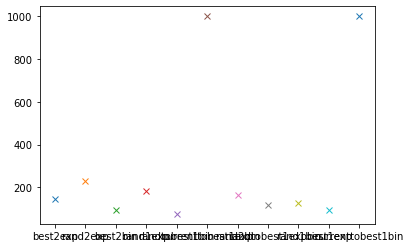

In [156]:
strategy_type = {'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin','best2bin', 'rand2bin', 'rand1bin'}

nit_min = 100000
strategy_type_min = 'a'
result_min = 'b' 

for i in strategy_type:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= i, popsize=15, tol=0.01, mutation=0.5, recombination=0.7, updating='immediate')
    plt.plot(i, result['nit'], 'x')
    if nit_min > result['nit']:
        nit_min = result['nit']
        strategy_type_min = i
        result_min = result
        
print(f" Минимальное значение числа итераций {nit_min} достигается методом {strategy_type_min}: \n {result_min}")

## Параметр popsize

In [81]:
popsize_i = [i for i in range(1,50)]
nit_min = 100000

 Минимальное значение числа итераций 15 достигается при значении параметра popsize = 7: 
      fun: 2.5799275570369713
     jac: array([4.97379913e-06, 2.80664381e-05])
 message: 'Optimization terminated successfully.'
    nfev: 239
     nit: 15
 success: True
       x: array([9.52166639e-01, 5.00351904e-07])


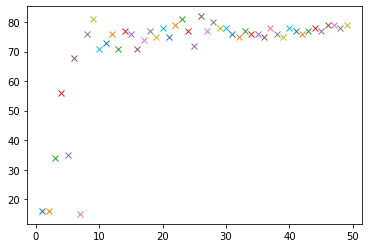

In [157]:
popsize_min = 0
for i in popsize_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=i, tol=0.01, mutation=0.5, recombination=0.7, updating='immediate')
    plt.plot(i, result['nit'], 'x')
    if nit_min > result['nit']:
        nit_min = result['nit']
        popsize_min = i
        result_min = result
        
print(f" Минимальное значение числа итераций {nit_min} достигается при значении параметра popsize = {popsize_min}: \n {result_min}")

Мы получили минимальное значение попыток равное 15, но при этом глобальный оптимум функции находится не в точке [0, 0], что не удовлетворяет условию задачи. Просмтрим все варианты:

In [117]:
nit_min = 100000
popsize_min = 0
for i in popsize_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=i, tol=0.01, mutation=0.5, recombination=0.7, updating='immediate')
    print(f" popsize = {i}, nit = {result['nit']}, x = {result['x']} ")

 popsize = 1, nit = 16, x = [-4.39196969e-09 -3.81408057e-09] 
 popsize = 2, nit = 16, x = [-4.39196969e-09 -3.81408057e-09] 
 popsize = 3, nit = 34, x = [-4.94221687e-09 -4.97023754e-09] 
 popsize = 4, nit = 56, x = [-2.69129163e-11 -2.32369679e-12] 
 popsize = 5, nit = 35, x = [-4.82822357e-09  1.06748772e-09] 
 popsize = 6, nit = 68, x = [0. 0.] 
 popsize = 7, nit = 15, x = [9.52166639e-01 5.00351904e-07] 
 popsize = 8, nit = 76, x = [0. 0.] 
 popsize = 9, nit = 81, x = [0. 0.] 
 popsize = 10, nit = 71, x = [0. 0.] 
 popsize = 11, nit = 73, x = [0. 0.] 
 popsize = 12, nit = 76, x = [0. 0.] 
 popsize = 13, nit = 71, x = [0. 0.] 
 popsize = 14, nit = 77, x = [0. 0.] 
 popsize = 15, nit = 76, x = [0. 0.] 
 popsize = 16, nit = 71, x = [0. 0.] 
 popsize = 17, nit = 74, x = [0. 0.] 
 popsize = 18, nit = 77, x = [0. 0.] 
 popsize = 19, nit = 75, x = [0. 0.] 
 popsize = 20, nit = 78, x = [0. 0.] 
 popsize = 21, nit = 75, x = [0. 0.] 
 popsize = 22, nit = 79, x = [0. 0.] 
 popsize = 23, nit 

popsize = 6popsize = 6, nit = 68, x = [0. 0.] - минимальное значение попыток (68) мы получаем при значении popsize = 6

## Параметр tol

 Минимальное значение числа итераций 68 достигается при значении параметра tol = 0.0001: 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 891
     nit: 68
 success: True
       x: array([0., 0.])


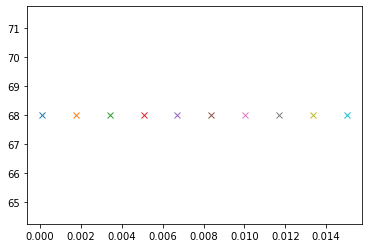

In [158]:
tol_i = np.linspace(0.0001, 0.015, num = 10)
nit_min = 100000

for i in tol_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=i, mutation=0.5, recombination=0.7, updating='immediate')
    plt.plot(i, result['nit'], 'x')
    if nit_min > result['nit']:
        nit_min = result['nit']
        tol_min = i
        result_min = result
        
print(f" Минимальное значение числа итераций {nit_min} достигается при значении параметра tol = {tol_min}: \n {result_min}")

## Параметр mutation

 Минимальное значение числа итераций 6 достигается при значении параметра mutation = 0.0: 
      fun: 6.559645375628232
     jac: array([ 1.77635685e-06, -5.68434192e-06])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 6
 success: True
       x: array([1.97445202, 1.97445187])


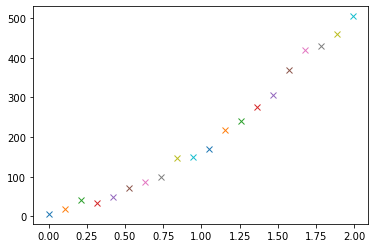

In [159]:
mutation_i = np.linspace(0, 1.99, num = 20)
nit_min = 100000

for i in mutation_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=i, recombination=0.7, updating='immediate')
    plt.plot(i, result['nit'], 'x')
    if nit_min > result['nit']:
        nit_min = result['nit']
        mutation_min = i
        result_min = result
        
print(f" Минимальное значение числа итераций {nit_min} достигается при значении параметра mutation = {mutation_min}: \n {result_min}")

Мы получили минимальное значение попыток равное 6, но при этом глобальный оптимум функции находится не в точке [0, 0], что не удовлетворяет условию задачи. Просмтрим все варианты:

In [129]:
mutation_i = np.linspace(0,m 1.99, num = 20)
nit_min = 100000

for i in mutation_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=i, recombination=0.7, updating='immediate')
    print(f" mutation = {i}, nit = {result['nit']}, x = {result['x']} ")

 mutation = 0.0, nit = 6, x = [1.97445202 1.97445187] 
 mutation = 0.10473684210526316, nit = 19, x = [-0.96847797 -0.96847785] 
 mutation = 0.2094736842105263, nit = 40, x = [-7.59313563e-06  1.08471485e-04] 
 mutation = 0.3142105263157895, nit = 33, x = [-5.01919796e-09 -5.11259058e-09] 
 mutation = 0.4189473684210526, nit = 48, x = [-2.78250811e-08 -1.10511485e-06] 
 mutation = 0.5236842105263158, nit = 71, x = [0. 0.] 
 mutation = 0.628421052631579, nit = 86, x = [0. 0.] 
 mutation = 0.7331578947368421, nit = 99, x = [0. 0.] 
 mutation = 0.8378947368421052, nit = 146, x = [0. 0.] 
 mutation = 0.9426315789473684, nit = 150, x = [0. 0.] 
 mutation = 1.0473684210526315, nit = 170, x = [0. 0.] 
 mutation = 1.1521052631578947, nit = 218, x = [0. 0.] 
 mutation = 1.256842105263158, nit = 241, x = [0. 0.] 
 mutation = 1.361578947368421, nit = 275, x = [0. 0.] 
 mutation = 1.4663157894736842, nit = 306, x = [0. 0.] 
 mutation = 1.5710526315789473, nit = 369, x = [0. 0.] 
 mutation = 1.6757

In [133]:
result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=0.5, recombination=0.7, updating='immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 891
     nit: 68
 success: True
       x: array([0., 0.])

При значении параметра mutation=0.5 кол-во итераций минимально (68)

## Параметр recombination

 Минимальное значение числа итераций 12 достигается при значении параметра recombination = 1: 
      fun: 2.5799275570346514
     jac: array([ 8.52651279e-06, -2.09610107e-05])
 message: 'Optimization terminated successfully.'
    nfev: 171
     nit: 12
 success: True
       x: array([ 9.52166711e-01, -3.87649972e-07])


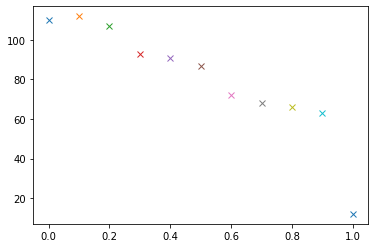

In [160]:
recombination_i = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
nit_min = 100000

for i in recombination_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=0.5, recombination=i, updating='immediate')
    plt.plot(i, result['nit'], 'x')
    if nit_min > result['nit']:
        nit_min = result['nit']
        recombination_min = i
        result_min = result
        
print(f" Минимальное значение числа итераций {nit_min} достигается при значении параметра recombination = {recombination_min}: \n {result_min}")

Мы получили минимальное значение попыток равное 12, но при этом глобальный оптимум функции находится не в точке [0, 0], что не удовлетворяет условию задачи. Просмтрим все варианты:

In [138]:
recombination_i = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
nit_min = 100000

for i in mutation_i:            
    result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=0.5, recombination=i, updating='immediate')
    print(f" recombination = {i}, nit = {result['nit']}, x = {result['x']} ")

 recombination = 0.0, nit = 110, x = [0. 0.] 
 recombination = 0.10473684210526316, nit = 121, x = [0. 0.] 
 recombination = 0.2094736842105263, nit = 100, x = [0. 0.] 
 recombination = 0.3142105263157895, nit = 89, x = [0. 0.] 
 recombination = 0.4189473684210526, nit = 83, x = [0. 0.] 
 recombination = 0.5236842105263158, nit = 84, x = [0. 0.] 
 recombination = 0.628421052631579, nit = 82, x = [0. 0.] 
 recombination = 0.7331578947368421, nit = 69, x = [0. 0.] 
 recombination = 0.8378947368421052, nit = 47, x = [-3.93732010e-06 -8.67812241e-07] 
 recombination = 0.9426315789473684, nit = 59, x = [0. 0.] 
 recombination = 1.0473684210526315, nit = 12, x = [ 9.52166711e-01 -3.87649972e-07] 
 recombination = 1.1521052631578947, nit = 12, x = [ 9.52166711e-01 -3.87649972e-07] 
 recombination = 1.256842105263158, nit = 12, x = [ 9.52166711e-01 -3.87649972e-07] 
 recombination = 1.361578947368421, nit = 12, x = [ 9.52166711e-01 -3.87649972e-07] 
 recombination = 1.4663157894736842, nit = 1

In [144]:
result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=0.5, recombination=0.94, updating='immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 771
     nit: 58
 success: True
       x: array([0., 0.])

При значении параметра recombination=0.94 кол-во итераций минимально (58)

##  Параметр updating

updating{‘immediate’, ‘deferred’}, optional

In [147]:
result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=0.5, recombination=0.94, updating='immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 771
     nit: 58
 success: True
       x: array([0., 0.])

In [148]:
result = differential_evolution(ackley, bounds, seed=42, strategy= 'randtobest1bin', popsize=6, tol=0.0001, mutation=0.5, recombination=0.94, updating='deferred')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1143
     nit: 89
 success: True
       x: array([0., 0.])

При значении параметра updating='immediate' количество итераций минимально (58)